<a href="https://colab.research.google.com/gist/daryarudenko/4c8068f1990f143dbb6b60f891cc6285/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЧАСТЬ 1. ПРЕДОБРАБОТКА ДАННЫХ

In [ ]:
#Импортируем данные
import pandas as pd
from google.colab import files
uploaded_1= files.upload()

Saving online_retail_II.csv to online_retail_II (1).csv


In [ ]:
#Автоматически определяем имя загруженного файла
onl = pd.read_csv(next(iter(uploaded_1)), sep=',')

2. ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ

In [ ]:
#Выводим 5 первых строк с целью визуальной проверки структуры данных, названий столбцов
display(onl.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
#Проверим типы данных всех столбцов
print(onl.info())

#В таблице 1067371 строк и 8 столбцов, обнаружены пропуски в Description и Customer ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None


3. ПРЕОБРАЗОВАНИЕ ТИПОВ ДАННЫХ

In [ ]:
#Преобразуем InvoiceDate в datetime
onl['InvoiceDate'] = pd.to_datetime(onl['InvoiceDate'])

In [ ]:
#Проверим изменение типа данных, InvoiceDate теперь имеет тип datetime64[ns]
print(onl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None


4. АНАЛИЗ И ОЧИСТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

In [ ]:
#Проанализируем столбец StockCode (код товара)
print(onl['StockCode'].unique())
print(onl['StockCode'].nunique())

#5305 уникальных кодов товаров - оставляем как есть

['85048' '79323P' '79323W' ... '23609' '23617' '23843']
5305


In [ ]:
#Проанализируем столбец Description (описание товара)
print(onl['Description'].unique())
print(onl['Description'].nunique())

['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
5698


In [ ]:
#Приведем описание к единому регистру
onl['Description']=onl['Description'].str.title()
print(onl['Description'].unique())
print(onl['Description'].nunique())

#Количество уникальных значений изменилось с 5698 до 5675

['15Cm Christmas Glass Ball 20 Lights' 'Pink Cherry Lights'
 ' White Cherry Lights' ... 'Mixed Up'
 'Cream Hanging Heart T-Light Holder' 'Paper Craft , Little Birdie']
5675


In [ ]:
#Проведем частотный анализ описаний товаров
print(onl['Description'].value_counts())

#Самое популярное: "White Hanging Heart T-Light Holder" (5918 раз)
#Не объединяем похожие названия, т.к. каждое описание уникально

Description
White Hanging Heart T-Light Holder    5918
Regency Cakestand 3 Tier              4412
Jumbo Bag Red Retrospot               3469
Assorted Colour Bird Ornament         2958
Party Bunting                         2765
                                      ... 
Dotcom Adjust                            1
Cat With Sunglasses Blank Card           1
Sold With Wrong Barcode                  1
John Lewis                               1
Set 10 Card Christmas Stamps 16963       1
Name: count, Length: 5675, dtype: int64


In [ ]:
#Проанализируем столбец Country
print(onl['Country'].unique())
print(onl['Country'].nunique())

#Результат: 43 уникальные страны

['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland'
 'Saudi Arabia' 'Czech Republic' 'European Community']
43


In [ ]:
#Проведем частотный анализ по странам
print(onl['Country'].value_counts())

#Великобритания доминирует: 981 330 записей (92%)

Country
United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169


5. ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ

In [ ]:
#Подсчитаем пропуски по столбцам
print(onl.isna().sum())

#Пропуски: Description (4382), Customer ID (243007)

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [ ]:
#Подсчитаем долю пропусков
print(onl.isna().mean())

#Description: 0.4%, Customer ID: 22.8%

Invoice        0.000000
StockCode      0.000000
Description    0.004105
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.227669
Country        0.000000
dtype: float64


In [ ]:
#Заполним пропуски в Description
onl['Description']=onl['Description'].fillna('UNKNOWN')
print(onl.isna().sum())

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [ ]:
#Заполним пропуски в Customer ID
onl['Customer ID']=onl['Customer ID'].fillna(-1)
print(onl.isna().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


6. ОБРАБОТКА ДУБЛИКАТОВ

In [ ]:
#Подсчитаем количество дубликатов
print(onl.duplicated().sum())

#Обнаружено 34 335 дубликатов

34335


In [ ]:
#Удаляем дубликаты во всей таблице
onl = onl.drop_duplicates()
print(onl.duplicated().sum())

#Все дубликаты удалены

0


7. АНАЛИЗ И ОЧИСТКА ЧИСЛОВЫХ ПРИЗНАКОВ

In [ ]:
#По onl.info() видим, что числовые столбцы : Quantity, Price

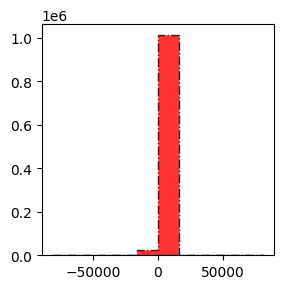

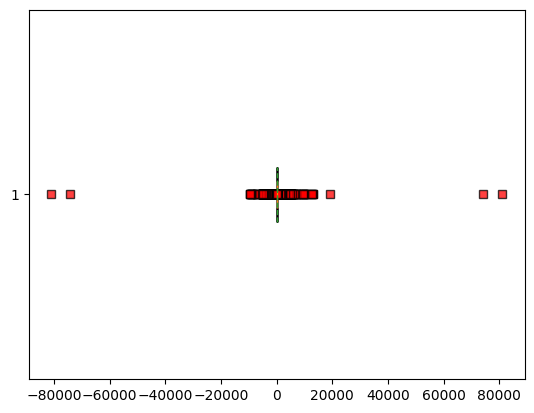

In [ ]:
#Построим ящик с усами и гистограмму для каждого столбца с данными
#Визуализация распределения Quantity (количество товара):

import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.hist(x=onl['Quantity'], alpha = 0.8,
         color='red', edgecolor = 'black', histtype = 'stepfilled',
         linewidth=1, linestyle = 'dashdot')
plt.show()


plt.boxplot(x=onl['Quantity'],
            vert = False, patch_artist= True, boxprops=dict(facecolor='red'),
            meanline = True, showmeans = True, flierprops=dict(markerfacecolor='red', marker = 's', alpha=0.75),
            notch=True)
plt.show()

In [ ]:
#Удаляем отрицательные значения (возвраты товара)
onl = onl[onl['Quantity'] > 0]

#Заменяем экстремальные выбросы (> 60000) на медиану
median_value = onl['Quantity'].median()
mask = onl['Quantity'] > 60000
onl.loc[mask, 'Quantity'] = median_value

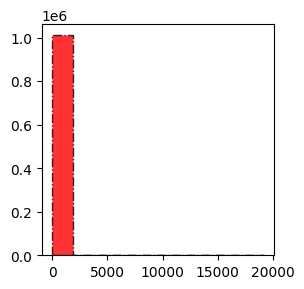

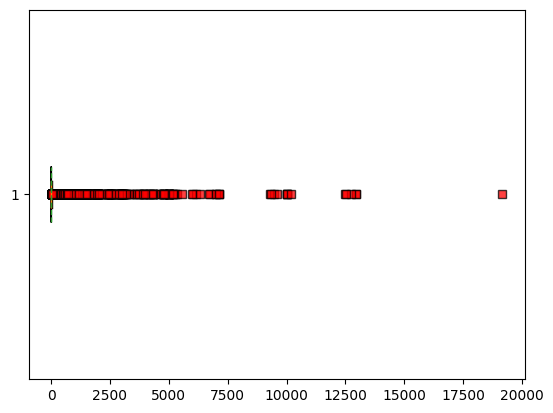

In [ ]:
#Проверка очистки Quantity
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.hist(x=onl['Quantity'], alpha = 0.8,
         color='red', edgecolor = 'black', histtype = 'stepfilled',
         linewidth=1, linestyle = 'dashdot')
plt.show()


plt.boxplot(x=onl['Quantity'],
            vert = False, patch_artist= True, boxprops=dict(facecolor='red'),
            meanline = True, showmeans = True, flierprops=dict(markerfacecolor='red', marker = 's', alpha=0.75),
            notch=True)
plt.show()

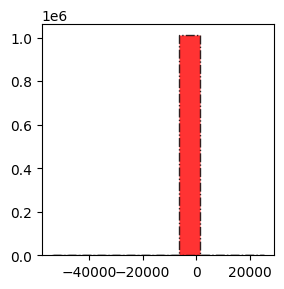

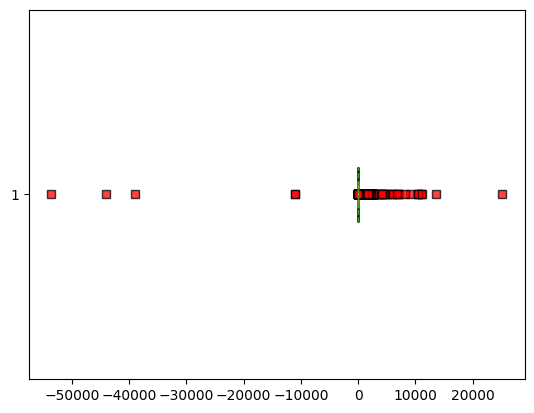

In [ ]:
#Визуализация распределения Price (цена)
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.hist(x=onl['Price'], alpha = 0.8,
         color='red', edgecolor = 'black', histtype = 'stepfilled',
         linewidth=1, linestyle = 'dashdot')
plt.show()


plt.boxplot(x=onl['Price'],
            vert = False, patch_artist= True, boxprops=dict(facecolor='red'),
            meanline = True, showmeans = True, flierprops=dict(markerfacecolor='red', marker = 's', alpha=0.75),
            notch=True)
plt.show()

In [ ]:
#Удаляем отрицательные цены (если есть)
onl = onl[onl['Price'] >= 0]

#Заменяем экстремальные выбросы (> 20000) на медиану
median_value = onl['Price'].median()
mask = onl['Price'] > 20000
onl.loc[mask, 'Price'] = median_value

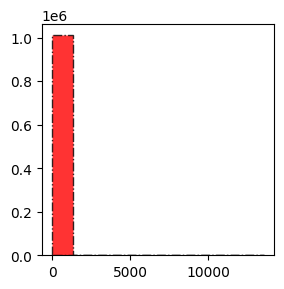

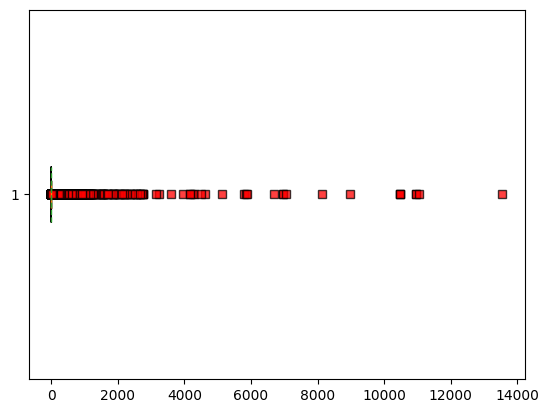

In [ ]:
#Проверка очистки Price
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.hist(x=onl['Price'], alpha = 0.8,
         color='red', edgecolor = 'black', histtype = 'stepfilled',
         linewidth=1, linestyle = 'dashdot')
plt.show()


plt.boxplot(x=onl['Price'],
            vert = False, patch_artist= True, boxprops=dict(facecolor='red'),
            meanline = True, showmeans = True, flierprops=dict(markerfacecolor='red', marker = 's', alpha=0.75),
            notch=True)
plt.show()

ИТОГ: Данные успешно предобработаны
- Устранены пропуски
- Удалены дубликаты
- Очищены от аномалий
- Приведены к корректным типам